In [7]:
import sqlite3, os, csv
#(ind integer, link text, name text, price integer, kms integer, year integer, insert_date date)
db_name = "myown.db"
table_name="cars_raw"
def getSQL(cmd):
    #Get cars which have multiple values in the database
    conn = sqlite3.connect(db_name)
    rows=[]
    for row in conn.execute(cmd):
        rows.append(row)
    conn.close()
    return rows

def runSQL(cmd):
    conn = sqlite3.connect(db_name)
    conn.execute(cmd)
    conn.commit()
    conn.close()

def printSQL(cmd):
    res = getSQL(cmd)
    for r in res:
        print(r)
    
printSQL('PRAGMA table_info(cars_raw);')

#https://www.nettiauto.com/volkswagen/transporter/9806664
#https://www.autotalli.com/vaihtoauto/36623384/Ford/Transit/2014/H%C3%A4meenlinna?pos=0&page=1&searchType=usedCar
#https://www.autotalli.com/vaihtoauto/36356948/Fiat/Scudo/2001/Kotka?pos=15&page=1&searchType=usedCar

#res=getSQL("SELECT DISTINCT link FROM cars_raw LIMIT 10")
#res=getSQL("SELECT DISTINCT link FROM cars_raw")
#printSQL("SELECT DISTINCT count(1) FROM cars_raw where name like '%autotie.fi%'")
#res=getSQL("SELECT DISTINCT link FROM cars_raw where name like '%auto%' LIMIT 10")
'''for r in res:
        #if not ("www" in r[0]):
        print(r[0])'''
#Remove link from name so it wont be "link.com/mercedes"
runSQL("UPDATE cars_raw set name = replace(name,'https://www.autotie.fi','') where name like 'https://www.autotie.fi%'")
runSQL("UPDATE cars_raw set link = 'https://www.autotie.fi' || link where link not like 'https://www.autotie.fi%' and link not like 'https://www.nettiauto.com%' and link not like 'https://www.autotalli.com%'")
printSQL("SELECT count(1) from cars_raw where link not like 'https://www.autotie.fi%' and link not like 'https://www.nettiauto.com%' and link not like 'https://www.autotalli.com%' LIMIT 100")
printSQL("SELECT count(1) FROM cars_raw where name like '%autotie.fi%'")

(0, 'ind', 'integer', 0, None, 0)
(1, 'link', 'text', 0, None, 0)
(2, 'name', 'text', 0, None, 0)
(3, 'price', 'integer', 0, None, 0)
(4, 'kms', 'integer', 0, None, 0)
(5, 'year', 'integer', 0, None, 0)
(6, 'insert_date', 'date', 0, None, 0)
(7, 'batchname', 'varchar(50)', 0, None, 0)
(0,)
(0,)


In [8]:
'''SELECT Group, COUNT(*)
FROM table
GROUP BY Group
ORDER BY COUNT(*) DESC'''

'SELECT Group, COUNT(*)\nFROM table\nGROUP BY Group\nORDER BY COUNT(*) DESC'

In [9]:
#Get car makes
import sqlite3 
db_name="myown.db"
data_name="cars_raw"

#Get cars which have multiple values in the database
conn = sqlite3.connect(db_name)
#ret=conn.execute("select name from cars_raw where name like 'Toyota%'").fetchall()
ret=conn.execute("select distinct name from cars_raw").fetchall()
#substr(trim(cmd),1,instr(trim(cmd)||' ',' ')-1)
ret=conn.execute("select distinct substr(trim(name),1,instr(trim(name)||' ',' ')-1) as Model, count(*) from cars_raw group by Model order by COUNT(*) DESC").fetchall()
conn.close()
car_makes=[]
car_models=[]
for line in ret:
    car_models.append(line[0])

for model in car_models:
    car_makes.append(model.partition(' ')[0])
print(car_makes)
print(car_models)

['Ford', 'Volkswagen', 'Mercedes-Benz', 'Volvo', 'Toyota', 'BMW', 'Opel', 'Audi', 'Skoda', 'Fiat', 'Renault', 'Nissan', 'Peugeot', 'Citroen', 'Mitsubishi', 'Mazda', 'Honda', 'Kia', 'Hyundai', 'KIA', 'Subaru', 'Chevrolet', 'Seat', 'Saab', 'SEAT', 'Chrysler', 'Land', 'Jaguar', 'Citroën', 'Lexus', 'Porsche', 'Suzuki', 'Dacia', 'Dodge', 'Jeep', 'Mini', 'Alfa', 'Adria', 'MINI', 'Cadillac', 'Lada', 'Pontiac', 'Burstner', 'Iveco', 'Isuzu', 'Tesla', 'Citro%C3%ABn', 'Dethleffs', 'Smart', 'Hobby', 'Daewoo', 'Ferrari', 'Lincoln', 'Lmc', 'Datsun', 'Maserati', 'Kabe', 'Plymouth', 'B%C3%BCrstner', 'Harley-Davidson', 'Buick', 'Rover', 'Carado', 'P%C3%B6ssl', 'Kawasaki', 'Bentley', 'GMC', 'Hymer', 'Sun', 'Oldsmobile', 'Knaus', 'Yamaha', 'Triumph', 'Solifer', 'SsangYong', 'TruckMasters', 'Lancia', 'Infiniti', 'Hummer', 'Mercury', 'MG', 'Daihatsu', 'Sunlight', 'Lamborghini', 'Fiat-Abarth', 'Moskvitsh', 'Ssangyong', 'Rolls-Royce', 'Aston', 'Vauxhall', 'Lotus', 'Harley', 'Austin', 'Morris', 'Casa', 'Rimor

In [10]:
#Based on this we get accepted car makes
#cars=['Ford', 'Mercedes-Benz', 'Volkswagen', 'Toyota', 'Fiat', 'Renault', 'Mitsubishi', 'Peugeot', 'Opel', 'Honda', 'Audi', 'Citroen', 'Volvo', 'Lada', 'Mazda', 'Nissan', 'BMW', 'Saab', 'Alfa Romeo', 'Buick', 'Pontiac', 'Talbot', 'Chrysler', 'Suzuki', 'Skoda', 'Hyundai', 'Seat', 'Chevrolet', 'Vauxhall', 'Datsun', 'Moskvitsh', 'Daewoo', 'Dodge', 'Isuzu', 'Datsun-Nissan', 'Austin', 'Wartburg', 'Rover', 'Subaru', 'Daihatsu', 'Triumph', 'Bedford', 'Trabant', 'KIA', 'Cadillac', 'Oldsmobile', 'Plymouth', 'Jeep', 'Neckar', 'GAZ', 'Mercury', 'Lancia', 'Volga', 'SsangYong', 'Land Rover', 'Dacia', 'Sunbeam', 'Jaguar', 'Smart', 'Iveco', 'GMC', 'Lincoln', 'DKW', 'AMC', 'MG', 'Hillman', 'Eagle', 'Mini', 'Morris', 'UAZ', 'Simca', 'Lexus', 'Rambler', 'Porsche', 'Daf', 'Hudson', 'Think', 'Willys', 'Wolseley', 'DeSoto', 'Jensen', 'Infiniti', 'Packard', 'Fiat', 'Nash', 'Daimler', 'TruckMasters', 'Hummer', 'Studebaker', 'Checker', 'Rolls-Royce', 'Hupmobile', 'Bentley', 'Maserati', 'Cobra', 'Caterham', 'Fuso', 'Armstrong', 'Tesla', 'Ferrari', 'Lotus', 'Aston', 'Fisker', 'Lamborghini', 'Ginetta', 'McLaren', 'Borgward', 'Leyland', 'MAN', 'Marcos', 'SEAT', 'Kia', 'Ssangyong', 'MINI', 'Mercedes', 'Harley-Davidson', 'Victory', 'Kawasaki', 'Ducati', 'Granduca', 'Lmc', 'Westfalia', 'Adria', 'Yamaha', 'Ktm', 'Harley', 'Jdm', 'Uaz', 'Piaggio', 'Knaus', 'Carado', 'Microcar', 'Dethleffs', 'Sunlight', 'Aixam', 'Casa', 'Ligier', 'Aprilia', 'Sunwind', 'Sun', 'Hymer', 'Bmw', 'Man', 'Lada-Vaz', 'Can-Am', 'Globecar', 'KTM', 'Eura', 'Bertone', 'Burstner', 'Polar', 'Kabe', 'Tabbert', 'Pw', 'Derbi', 'Kymco', 'Polaris', 'Sea', 'Buster', 'Mclouis', 'Rimor', 'Gm', 'DS', 'Riviera', 'Truckmasters', 'Hobby', 'Cabby', 'Solifer', 'Challenger', 'Elnagh', 'Weinsberg', 'Joint', 'Miller', 'Karmann', 'Carthago', 'Sharky', 'Flair', 'Simson', 'Bmwi', 'Piccolo', 'Uttern', 'Matkaaja', 'Fendt', 'Rapido', 'Vespa', 'Niewiadow', 'Standard', 'Acadian', 'Acura', 'ZAZ', 'Lloyd', 'Matra', 'Riley', 'Frazer', 'Pinzgauer', 'NSU', 'London', 'TVR', 'Citroën', 'Chatenet', 'Poksi', 'Radical', 'Morgan', 'Maybach', 'Rotec', 'Capron', 'Gilera', 'FSO', 'Trapper', 'Essex', 'Ci', 'DFSK']
cars=['Ford', 'Volkswagen', 'Mercedes-Benz', 'Volvo', 'Toyota', 'BMW', 'Opel', 'Audi', 'Skoda', 'Fiat', 'Renault', 'Nissan', 'Peugeot', 'Citroen', 'Mitsubishi', 'Mazda', 'Honda', 'Kia', 'Hyundai', 'KIA', 'Subaru', 'Chevrolet', 'Seat', 'Saab', 'SEAT', 'Chrysler', 'Land', 'Jaguar', 'Citroën', 'Lexus', 'Porsche', 'Suzuki', 'Dacia', 'Dodge', 'Jeep', 'Mini', 'Alfa', 'Adria', 'MINI', 'Cadillac', 'Lada', 'Pontiac', 'Burstner', 'Iveco', 'Isuzu', 'Tesla']
excluded = [c for c in car_makes if (c not in cars)]

In [11]:
print(cars)
print(len(cars))

['Ford', 'Volkswagen', 'Mercedes-Benz', 'Volvo', 'Toyota', 'BMW', 'Opel', 'Audi', 'Skoda', 'Fiat', 'Renault', 'Nissan', 'Peugeot', 'Citroen', 'Mitsubishi', 'Mazda', 'Honda', 'Kia', 'Hyundai', 'KIA', 'Subaru', 'Chevrolet', 'Seat', 'Saab', 'SEAT', 'Chrysler', 'Land', 'Jaguar', 'Citroën', 'Lexus', 'Porsche', 'Suzuki', 'Dacia', 'Dodge', 'Jeep', 'Mini', 'Alfa', 'Adria', 'MINI', 'Cadillac', 'Lada', 'Pontiac', 'Burstner', 'Iveco', 'Isuzu', 'Tesla']
46


In [12]:
#Get car makes 
#we select 46 most popular
#get average price of the cars
#TODO: this does not take into account duplicate values

#Get cars which have multiple values in the database
conn = sqlite3.connect(db_name)
#ret=conn.execute("select name from cars_raw where name like 'Toyota%'").fetchall()
ret=conn.execute("select distinct name from cars_raw").fetchall()
#substr(trim(cmd),1,instr(trim(cmd)||' ',' ')-1)
ret=conn.execute("select distinct substr(trim(name),1,instr(trim(name)||' ',' ')-1) as Model, count(distinct(link)), avg(price) from cars_raw where price > 500 group by Model order by count(*) DESC LIMIT 46").fetchall()
conn.close()
res=[]
print(("Model","Count","Price"))
for line in ret:
    print(line)
    res.append(line)


('Model', 'Count', 'Price')
('Volkswagen', 23578, 15858.467718370837)
('Mercedes-Benz', 21862, 22518.972199824315)
('BMW', 20226, 22566.38665835635)
('Ford', 17317, 18034.007092847874)
('Volvo', 17733, 20987.86769701168)
('Toyota', 16422, 14047.617387264221)
('Audi', 14090, 21521.41979800807)
('Opel', 9875, 14705.96001306896)
('Skoda', 9949, 17067.249854490547)
('Nissan', 8796, 13441.651904834125)
('Citroen', 4574, 5773.717756676558)
('Peugeot', 5574, 10075.700797052108)
('Renault', 4485, 12142.335708793578)
('Honda', 4333, 12382.633304961699)
('Mazda', 3733, 12949.835681355456)
('Hyundai', 3285, 13737.488754491018)
('Kia', 2396, 20864.345161788555)
('Mitsubishi', 3242, 16564.187611712754)
('KIA', 3620, 16336.887195670528)
('Fiat', 2266, 7674.795050431528)
('Subaru', 1737, 17728.35739346026)
('Chevrolet', 1783, 9942.728675570692)
('Seat', 1795, 9878.253058651615)
('SEAT', 787, 16037.610756278125)
('Saab', 1302, 4749.610141927853)
('Chrysler', 1189, 4482.899910320895)
('Land', 936, 3624

In [186]:
#analyze peogeot and seperate by different makes

#make some histograms

#Get cars which have multiple values in the database
conn = sqlite3.connect(db_name)
#ret=conn.execute("select name from cars_raw where name like 'Toyota%'").fetchall()
#ret=conn.execute("select distinct name from cars_raw").fetchall()
#substr(trim(cmd),1,instr(trim(cmd)||' ',' ')-1)
ret=conn.execute("select distinct name, price, link, kms, insert_date from cars_raw where name like '%C4%' group by link, insert_date").fetchall()
dat=conn.execute("select distinct insert_date from cars_raw where name like 'Citroen%' group by insert_date").fetchall()

conn.close()
res=[]
#print(("Model","Price"))
for line in ret:
    #print(line)
    res.append(line)
dates=[]
for d in dat:
    dates.append(d[0])
print("Done")

Done


In [187]:
#for each date, make a row for each link, then insert the value for the index of the date
r = [0] * (len(dates))
'''print(r)
print(dates)'''
cleaned=[]
cleaned.append(["Header"]+ dates)

headers=[]
for i in range(len(res)):
    header = res[i][0]+" "+res[i][2]
    date = res[i][4]
    price = str(res[i][1]).strip('€').replace(" ","").replace("Eihinnoiteltu","")
    if price == "":
        next
    #print("Price is "+price)
    try:
        price = int(float(price.replace(" ","")))
    except ValueError:
        next
    #kms = res[i][3]
    if header not in headers:
        cleaned.append([header]+r)
        headers.append(header)
        
    x=headers.index(header)
    y=dates.index(date)+1 #dates does not have name column
    
    cleaned[x][y]=price
    
    #cleaned[i][1]=res[i][1].strip('€').replace(" ","").replace("Eihinnoiteltu","")
print("Done")   
#print(cleaned)


Done


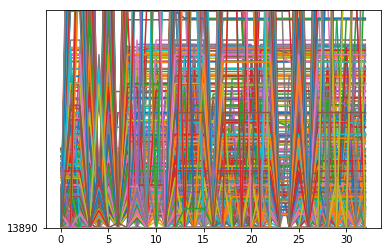

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [203]:
import matplotlib.pyplot as plt
import numpy as np
import csv

csvfile=open('fileName.csv', 'w')
csvwriter=csv.writer(csvfile, delimiter=';', quotechar='"')

fig, ax = plt.subplots()

for c in cleaned:
    csvwriter.writerow(c)
    header=c[0]
    data=c[1:]
    #print(header)
    ax.plot(data)
    ax.set_ylim((0,30000))
csvfile.close()
plt.yticks('auto')
plt.show()
print(data)

In [94]:
for r in res:
    if r[1]!='' and r[1]!='Eihinnoiteltu':
        str(r[1]).strip('€').replace(" ","")



y=[str(x[1]).strip('€').replace(" ","") for x in res]
#print(y)
p=[int(z) for z in y if z !='' and z != 'Eihinnoiteltu']
#print(p)

elements=p

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in p if (x > mean - 3 * sd)]
final_list = [x for x in final_list if (x < mean + 3 * sd)]

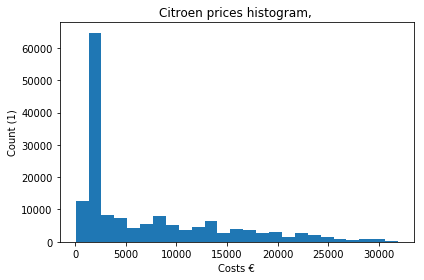

In [95]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(19680801)

# example data
'''mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)'''

num_bins = 25

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(final_list, num_bins)

# add a 'best fit' line
'''y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')'''
ax.set_xlabel('Costs €')
ax.set_ylabel('Count (1)')
ax.set_title(r'Citroen prices histogram. Outliers removed')



# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [30]:
#make stdev for SQLite
import math

class stdev:
    def __init__(self):
        self.count = 0
        self.mean = 0
        self.val = []

    def step(self, value):
        try:
            value=str(value)
            number=value.replace(" ","").replace("€","")
            self.val.append(int(number))
        except ValueError:
            #Do nothing
            return
    def finalize(self):
        #get average
        n=len(self.val)
        if n==0:
            return 0
        #print("Final number of values "+str(n))
        summa=float(sum(self.val))
        avg=summa/n
        s=float(0)
        for v in self.val:
            dx=avg-v
            dx=dx*dx
            s=s+dx
        s=s/n
        s=math.sqrt(s)
        
        return s
    
ll=[4, 9, 11, 12, 17, 5, 8, 12, 14]   #should return 3.94 ish https://revisionmaths.com/gcse-maths-revision/statistics-handling-data/standard-deviation
st=stdev()
for l in ll:
    st.step(l)
print(st.finalize())

3.9377878103709665


In [87]:
import sqlite3

con = sqlite3.connect("myown.db")
con.create_aggregate("stdev", 1, stdev)
cur = con.cursor()
sqlite3.enable_callback_tracebacks(True)
#cur.execute("select name, stdev(price) from cars_raw where name like '%C4%'")
cur.execute("select name, avg(price), stdev(price), count(1) from cars_raw where name like '%Citroen C4%' group by name")
res=cur.fetchall()

print(len(res))
for r in res:
    if(r[2]==0):
        res.remove(r)
    else:
        print(r)


20
('Citroen C4', 10068.942426926484, 5747.861031110304, 9032)
('Citroen C4 (1.4)', 5273.629441624365, 3425.1821145139324, 394)
('Citroen C4 (1.6)', 1040.491422585873, 2593.476476916248, 50598)
('Citroen C4 (2.0)', 242.5589114702951, 565.0371391997564, 23077)
('Citroen C4 Aircross', 16306.894259818731, 2595.53578149261, 331)
('Citroen C4 Aircross (1.6)', 14195.65129682997, 2431.4126266933276, 347)
('Citroen C4 Cactus (0.0)', 20772.043478260868, 1369.7934630757231, 138)
('Citroen C4 Cactus (1.2)', 18082.91952983725, 4385.253961908176, 2212)
('Citroen C4 Cactus (1.6)', 11194.989169675091, 2299.188687347656, 277)
('Citroen C4 Picasso (1.2)', 28248.447916666668, 106.85151423236827, 96)
('Citroen C4 Picasso (1.6)', 9503.146095717884, 5723.7103224862285, 1588)
('Citroen C4 Picasso (1.7)', 3213.1488095238096, 418.0320949170468, 168)
('Citroen C4 Picasso (1.8)', 1282.1739130434783, 895.7821771416799, 46)
('Citroen C4 Picasso (2.0)', 6486.830357142857, 5334.315449614459, 448)


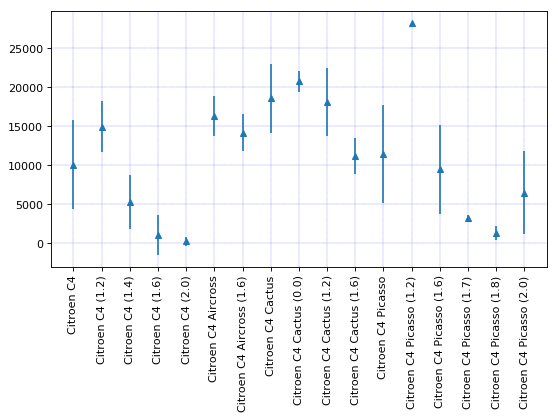

In [88]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

count=1
y=[]
e=[]
x=[]
l=[]
for r in res:
    l.append(r[0])
    y.append(r[1])
    e.append(r[2])
    x.append(count)
    count=count+1
fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.xticks(x, l, rotation='vertical')
plt.subplots_adjust(top=0.9,bottom=0.5)
plt.grid(color='blue', linestyle='--', linewidth=0.2)
plt.savefig("img.png")
plt.show()